### Amazon Customer Reviews Dataset columns

For this notebook, we will query a subset of reviews for the `Digital Software`, `Digital Video Games`, and `Gift Card` product categories.

* marketplace: 2-letter country code (in this case all "US").

* customer_id: Random identifier that can be used to aggregate reviews written by a single author.

* review_id: A unique ID for the review.

* product_id: The Amazon Standard Identification Number (ASIN). http://www.amazon.com/dp/<ASIN> links to the product's detail page.

* product_parent: The parent of that ASIN. Multiple ASINs (color or format variations of the same product) can roll up into a single parent.
    
* product_title: Title description of the product.

* product_category: Broad product category that can be used to group reviews (in this case digital videos).

* star_rating: The review's rating (1 to 5 stars).

* helpful_votes: Number of helpful votes for the review.

* total_votes: Number of total votes the review received.

* vine: Was the review written as part of the Vine program?
    
* verified_purchase: Was the review from a verified purchase?

* review_headline: The title of the review itself.

* review_body: The text of the review.

* review_date: The date the review was written.
    
* year: The year derived from the review date.

## 1. Which Product Categories are Highest Rated by Average Rating?

In [ ]:
# SQL statement
statement = """
    SELECT product_category, AVG(star_rating) AS Avg_Star_Rating 
    FROM {}.{} 
    WHERE product_category in ('Digital Software', 'Digital Video Games', 'Gift Card')
    GROUP BY product_category
    ORDER BY Avg_Star_Rating DESC
""".format(
    database_name, table_name
)

print(statement)

df = pd.read_sql(statement, conn)
df.head(5)

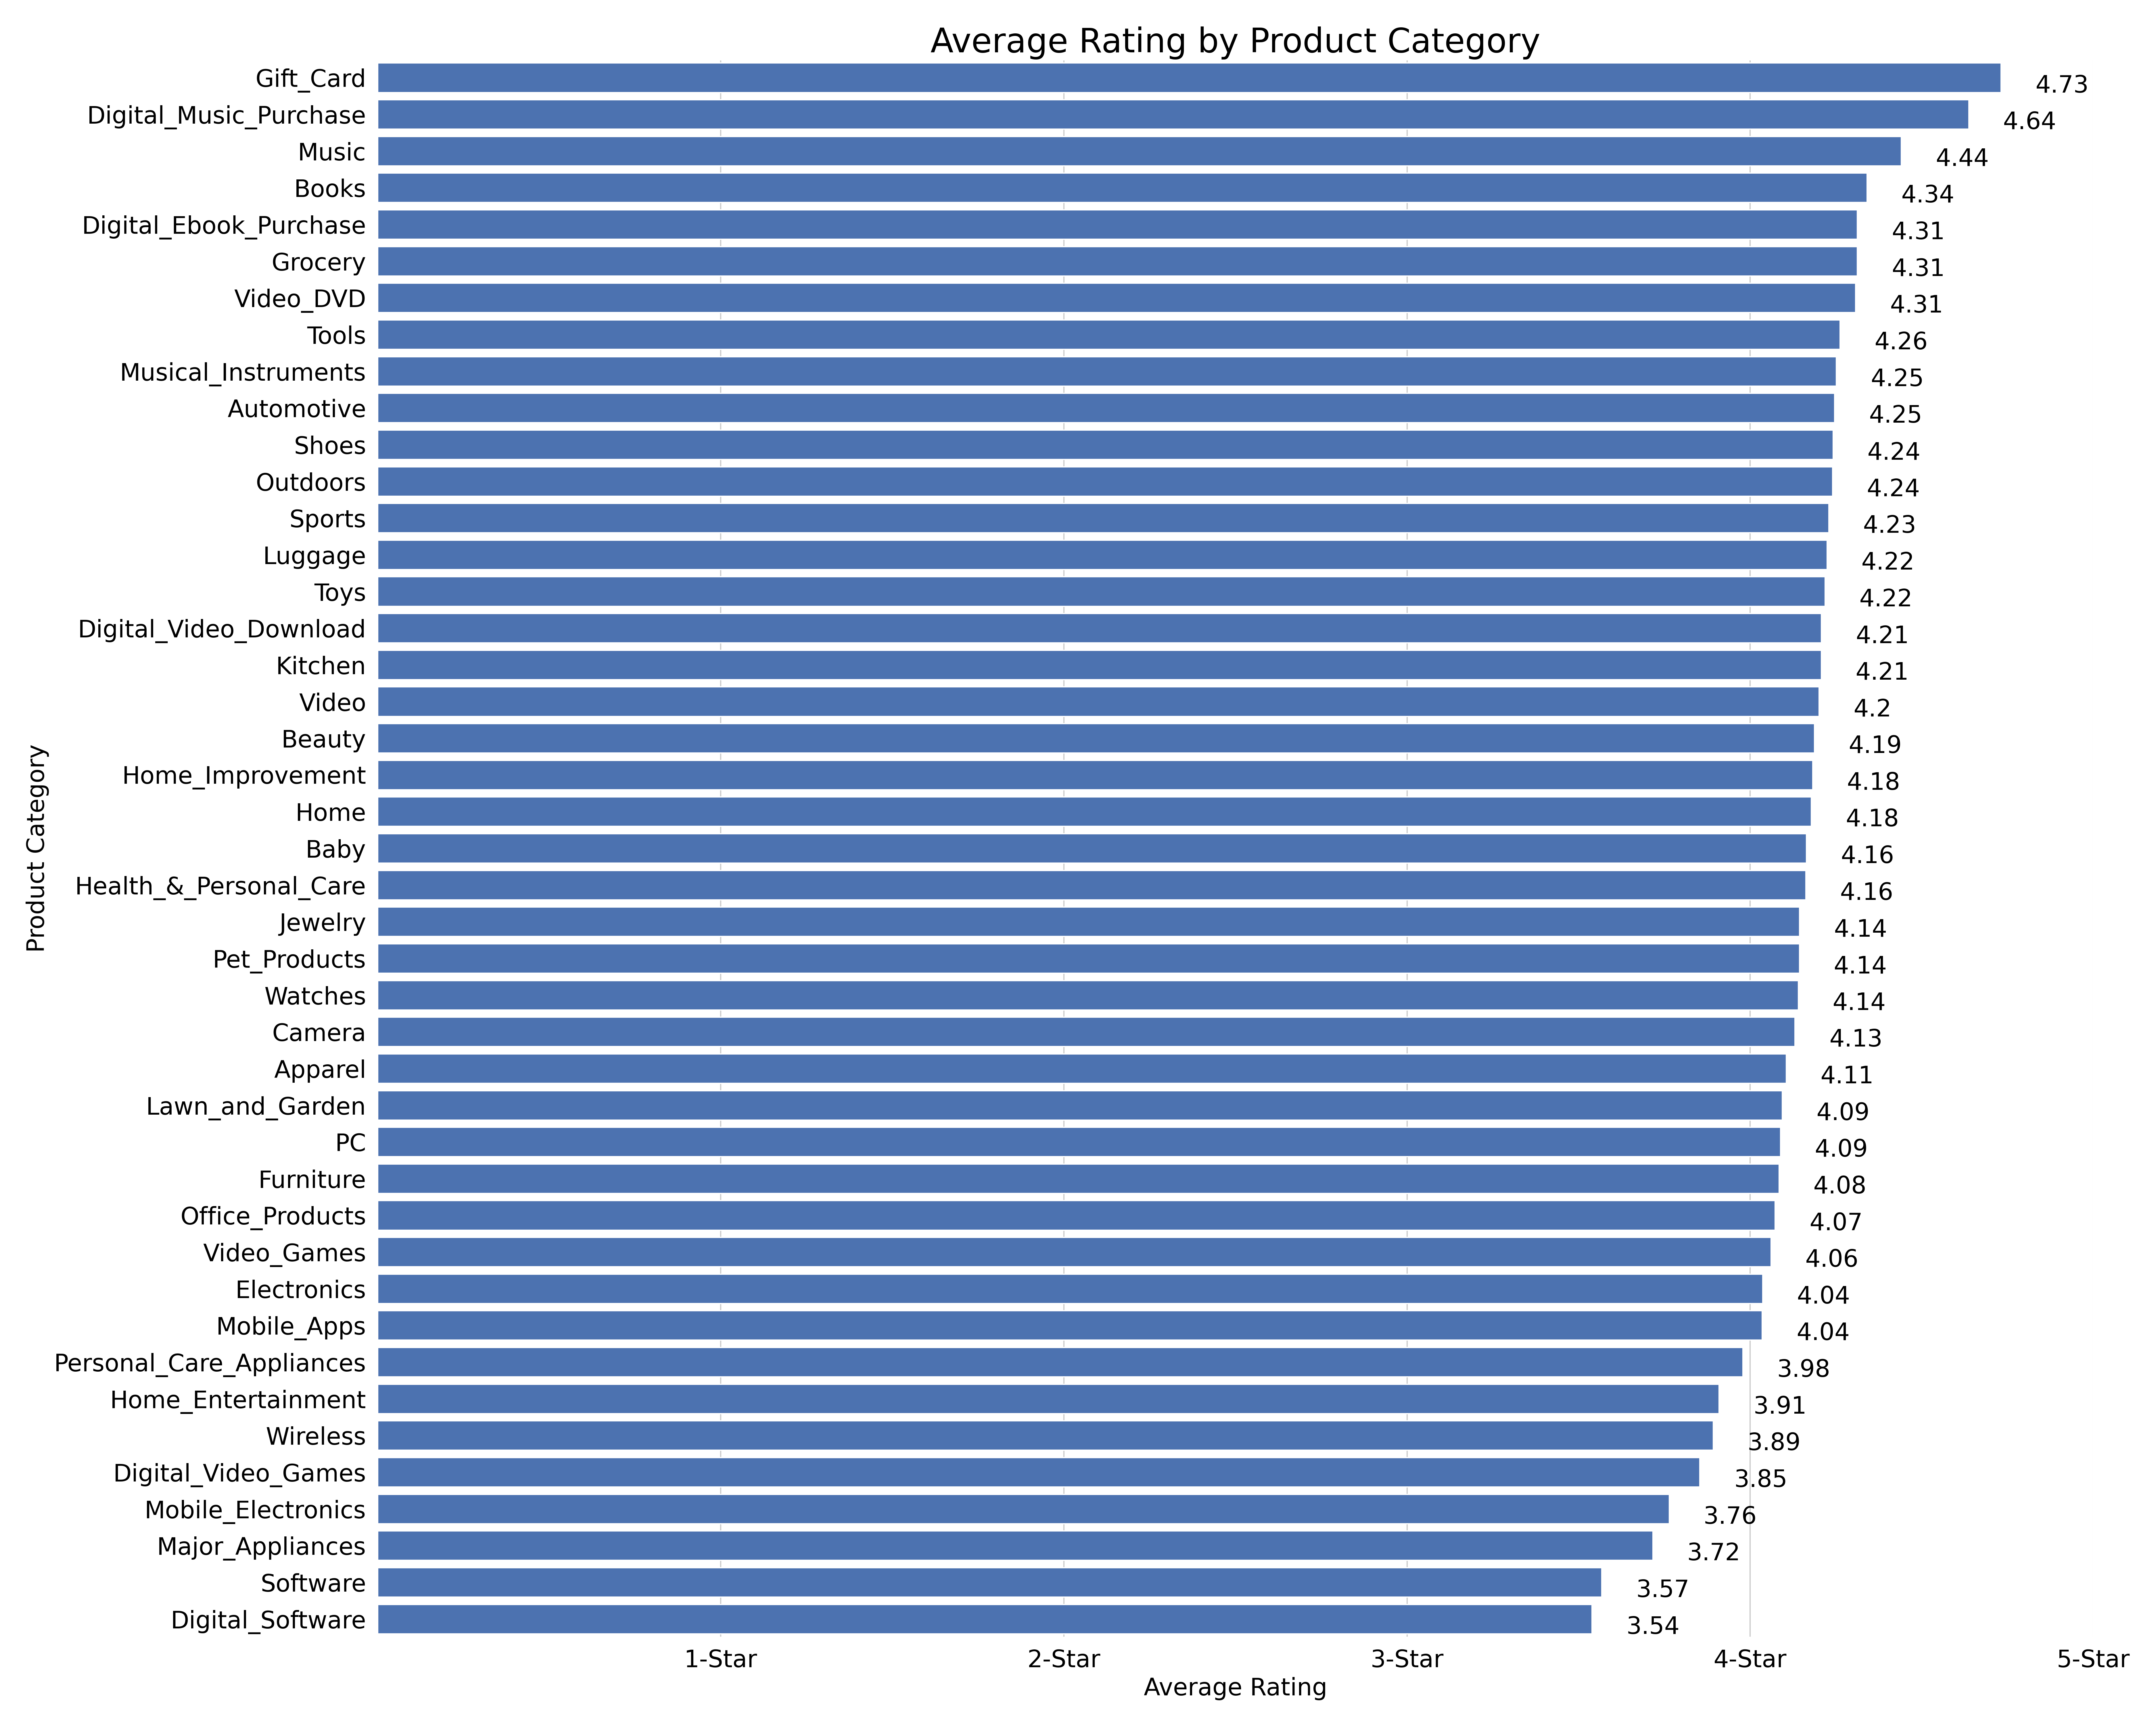

## 2. Which Product Categories Have the Most Reviews?

In [ ]:
# SQL statement
statement = """
    SELECT product_category, COUNT(star_rating) AS Count_Star_Rating
    FROM {}.{}
    WHERE product_category in ('Digital Software', 'Digital Video Games', 'Gift Card')
    GROUP BY product_category
    ORDER BY Count_Star_Rating DESC
""".format(
    database_name, table_name
)

print(statement)

df = pd.read_sql(statement, conn)
df.head(5)

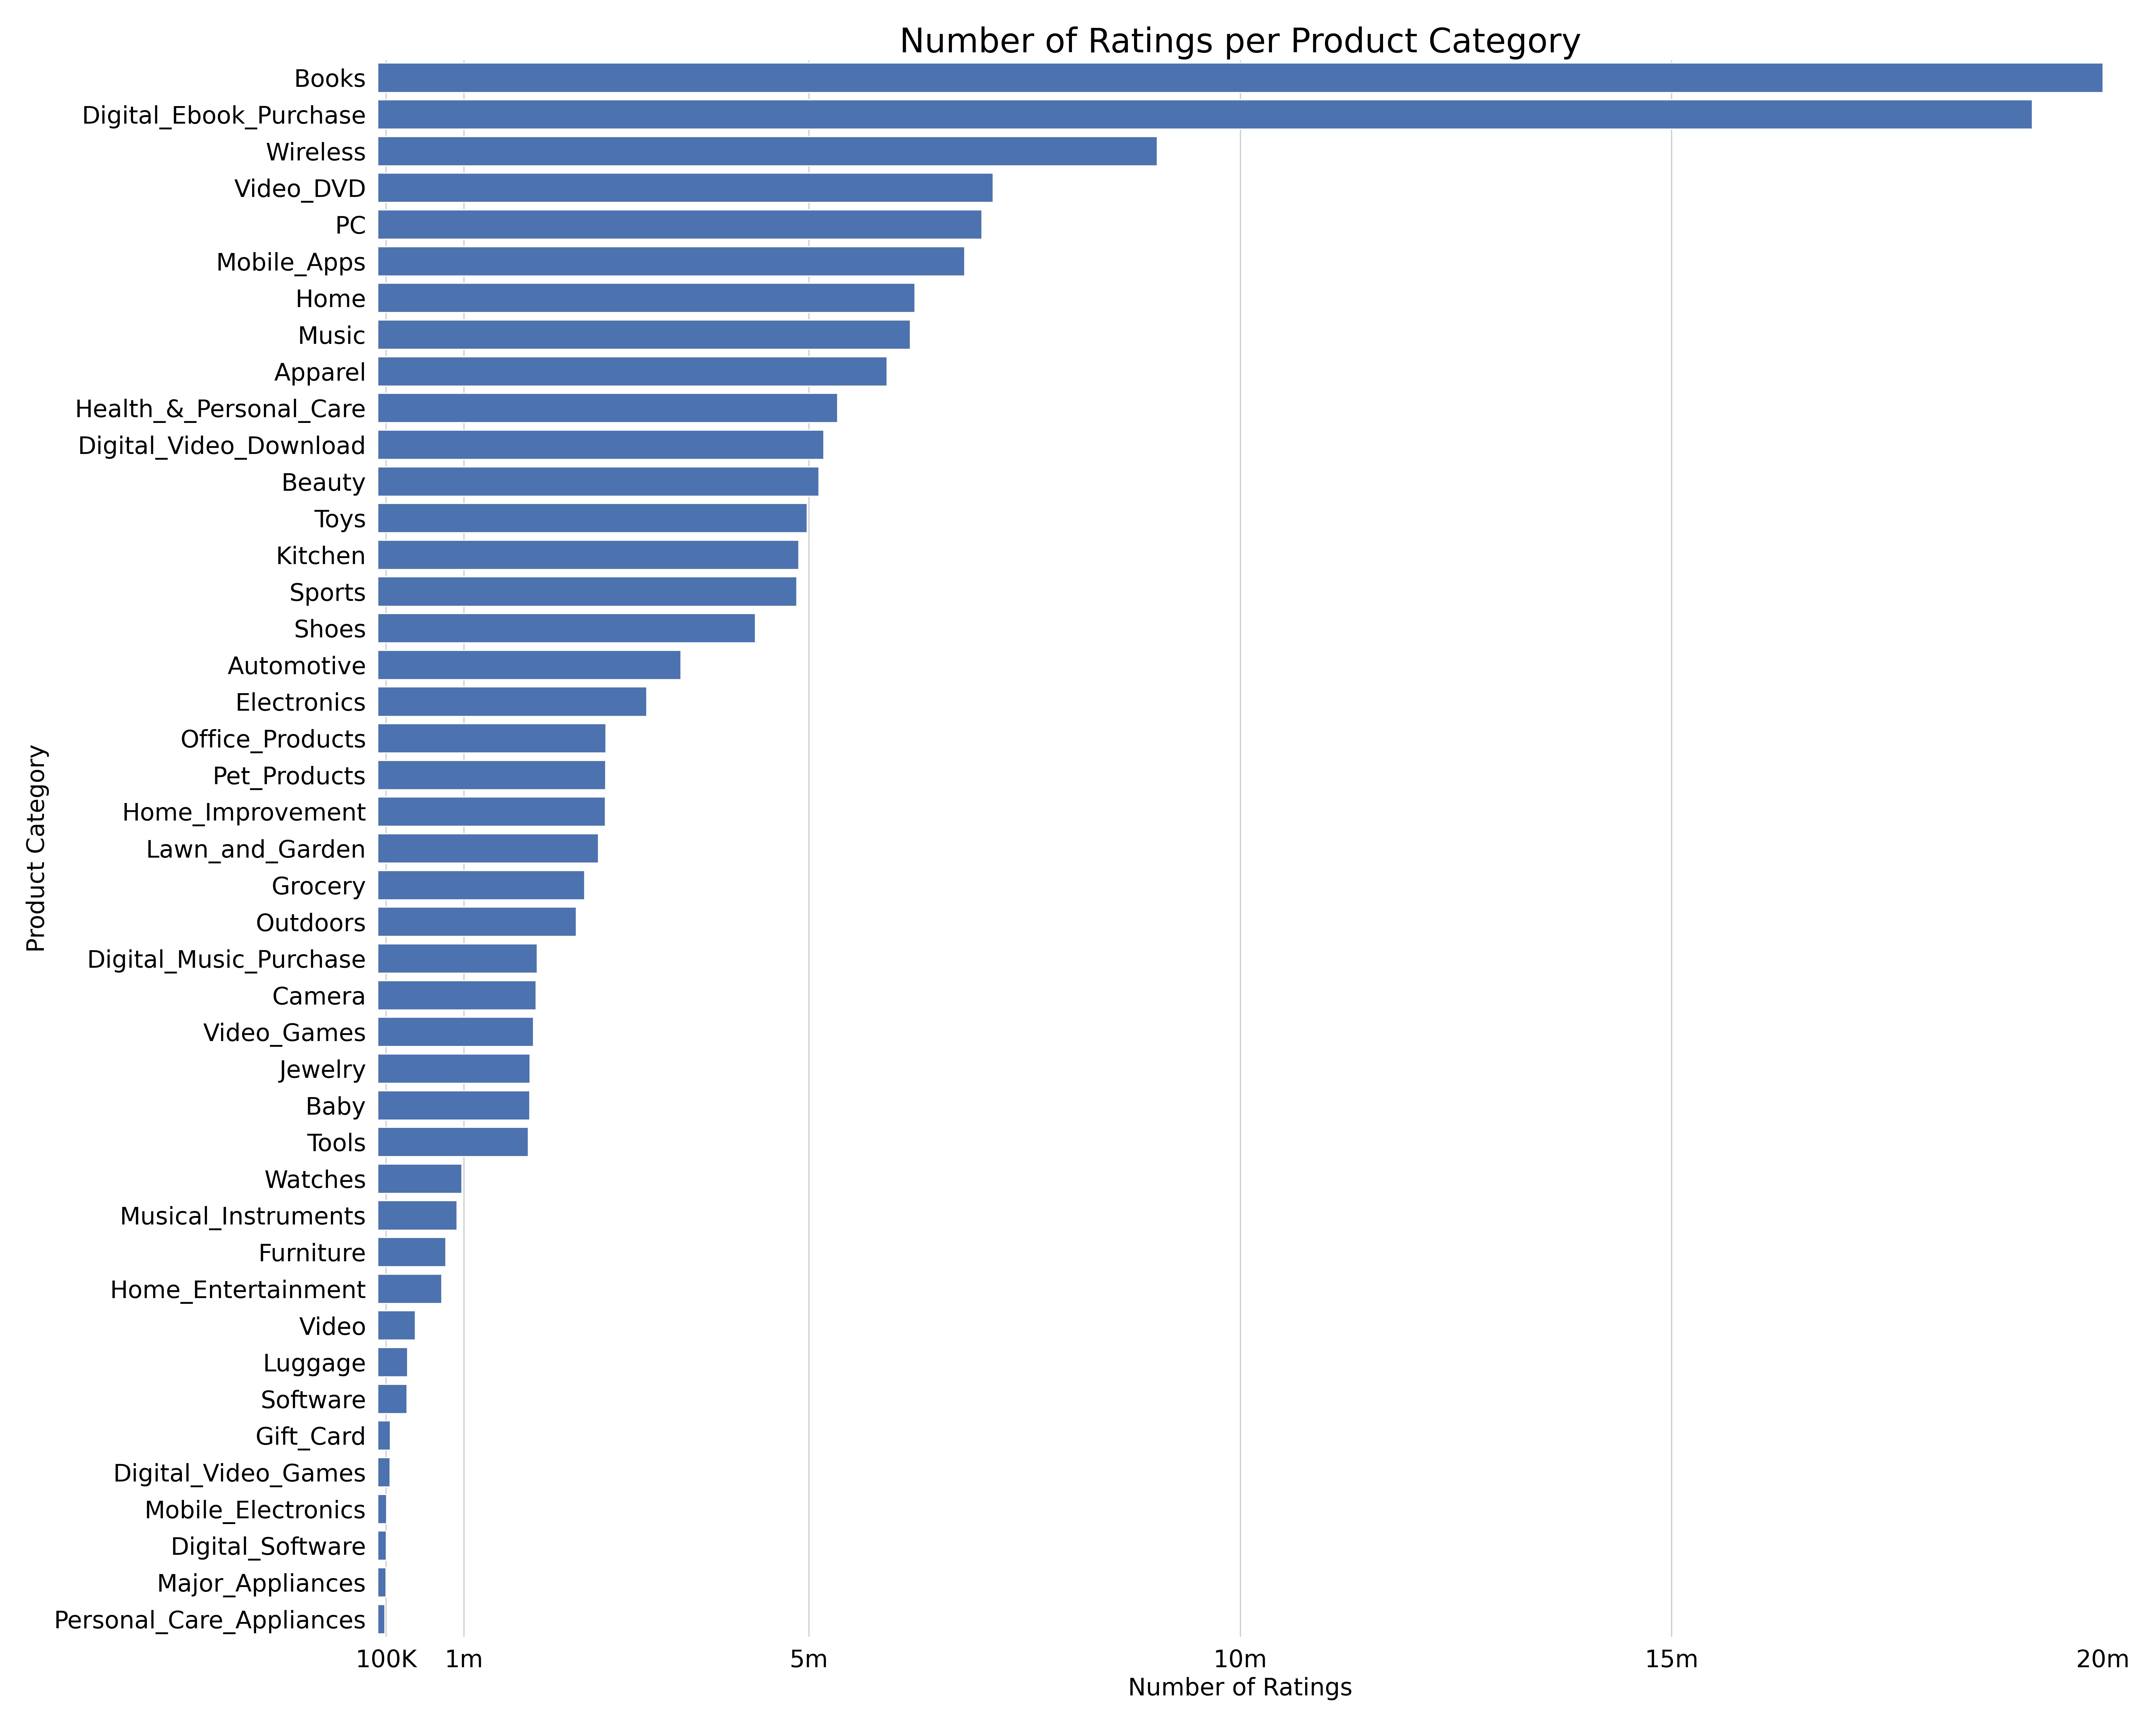

## 3. When did each product category become available in the Amazon catalog based on the date of the first review?

In [ ]:
# SQL statement
statement = """
    SELECT product_category, MIN(year) AS first_review_year
    FROM {}.{}
    WHERE product_category in ('Digital Software', 'Digital Video Games', 'Gift Card')
    GROUP BY product_category
    ORDER BY first_review_year 
""".format(
    database_name, table_name
)

print(statement)

df = pd.read_sql(statement, conn)
df.head(5)

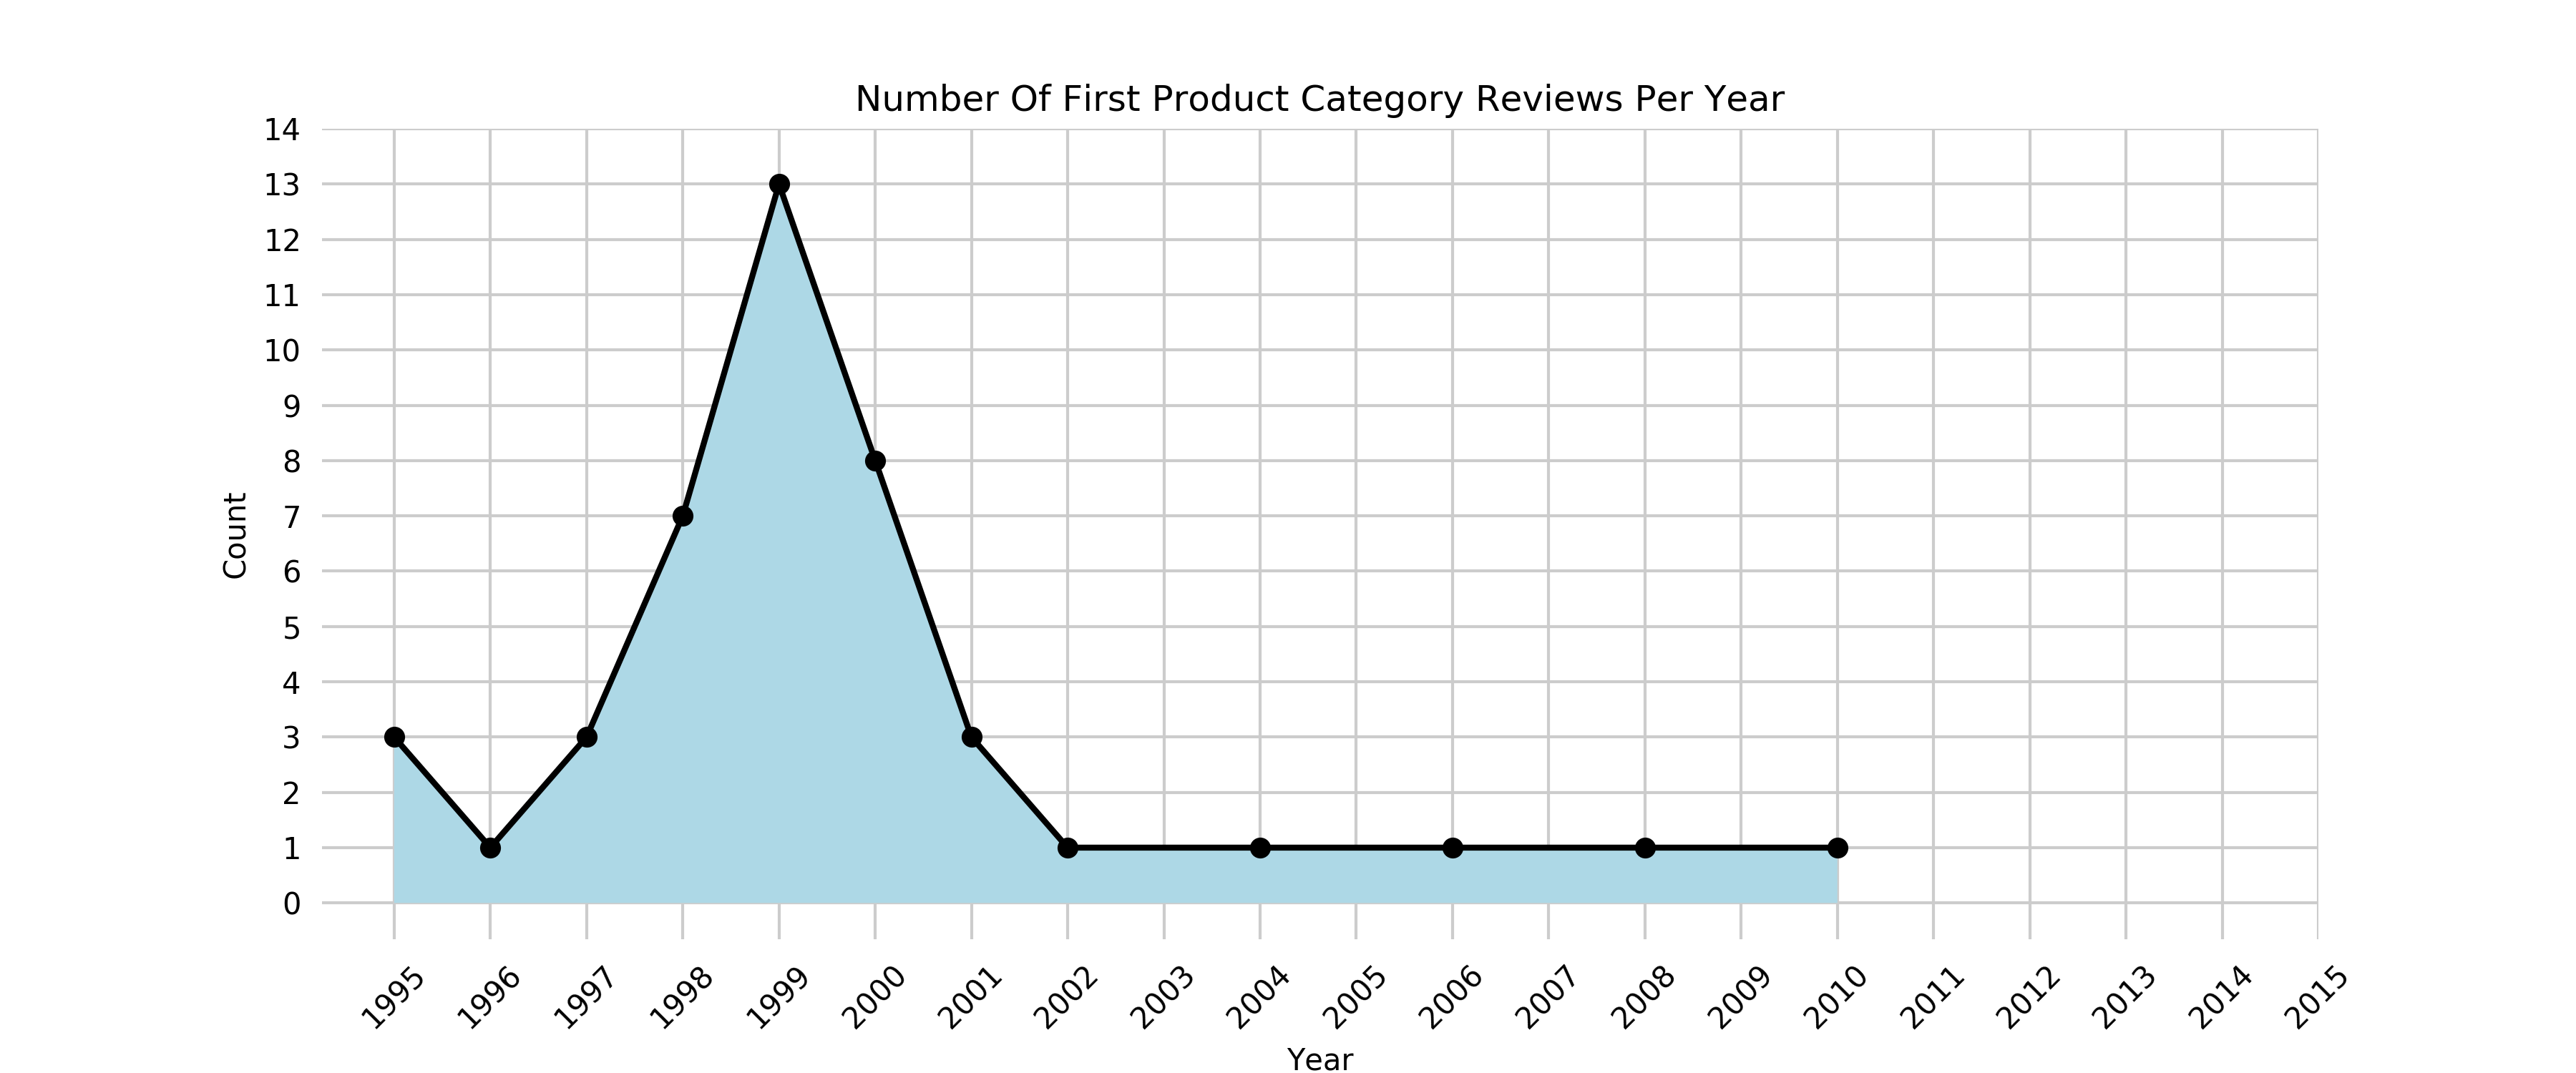

## 4. What is the breakdown of ratings (1-5) per product category?

In [ ]:
# SQL statement
statement = """
    SELECT product_category, star_rating, COUNT(*) AS Count_Review
    FROM {}.{}
    WHERE product_category in ('Digital_Software', 'Gift_Card', 'Digital_Video_Games') 
    GROUP BY product_category, star_rating
    ORDER BY product_category ASC, star_rating DESC, Count_Review 
""".format(
    database_name, table_name
)

print(statement)

df = pd.read_sql(statement, conn)
df.head(5)

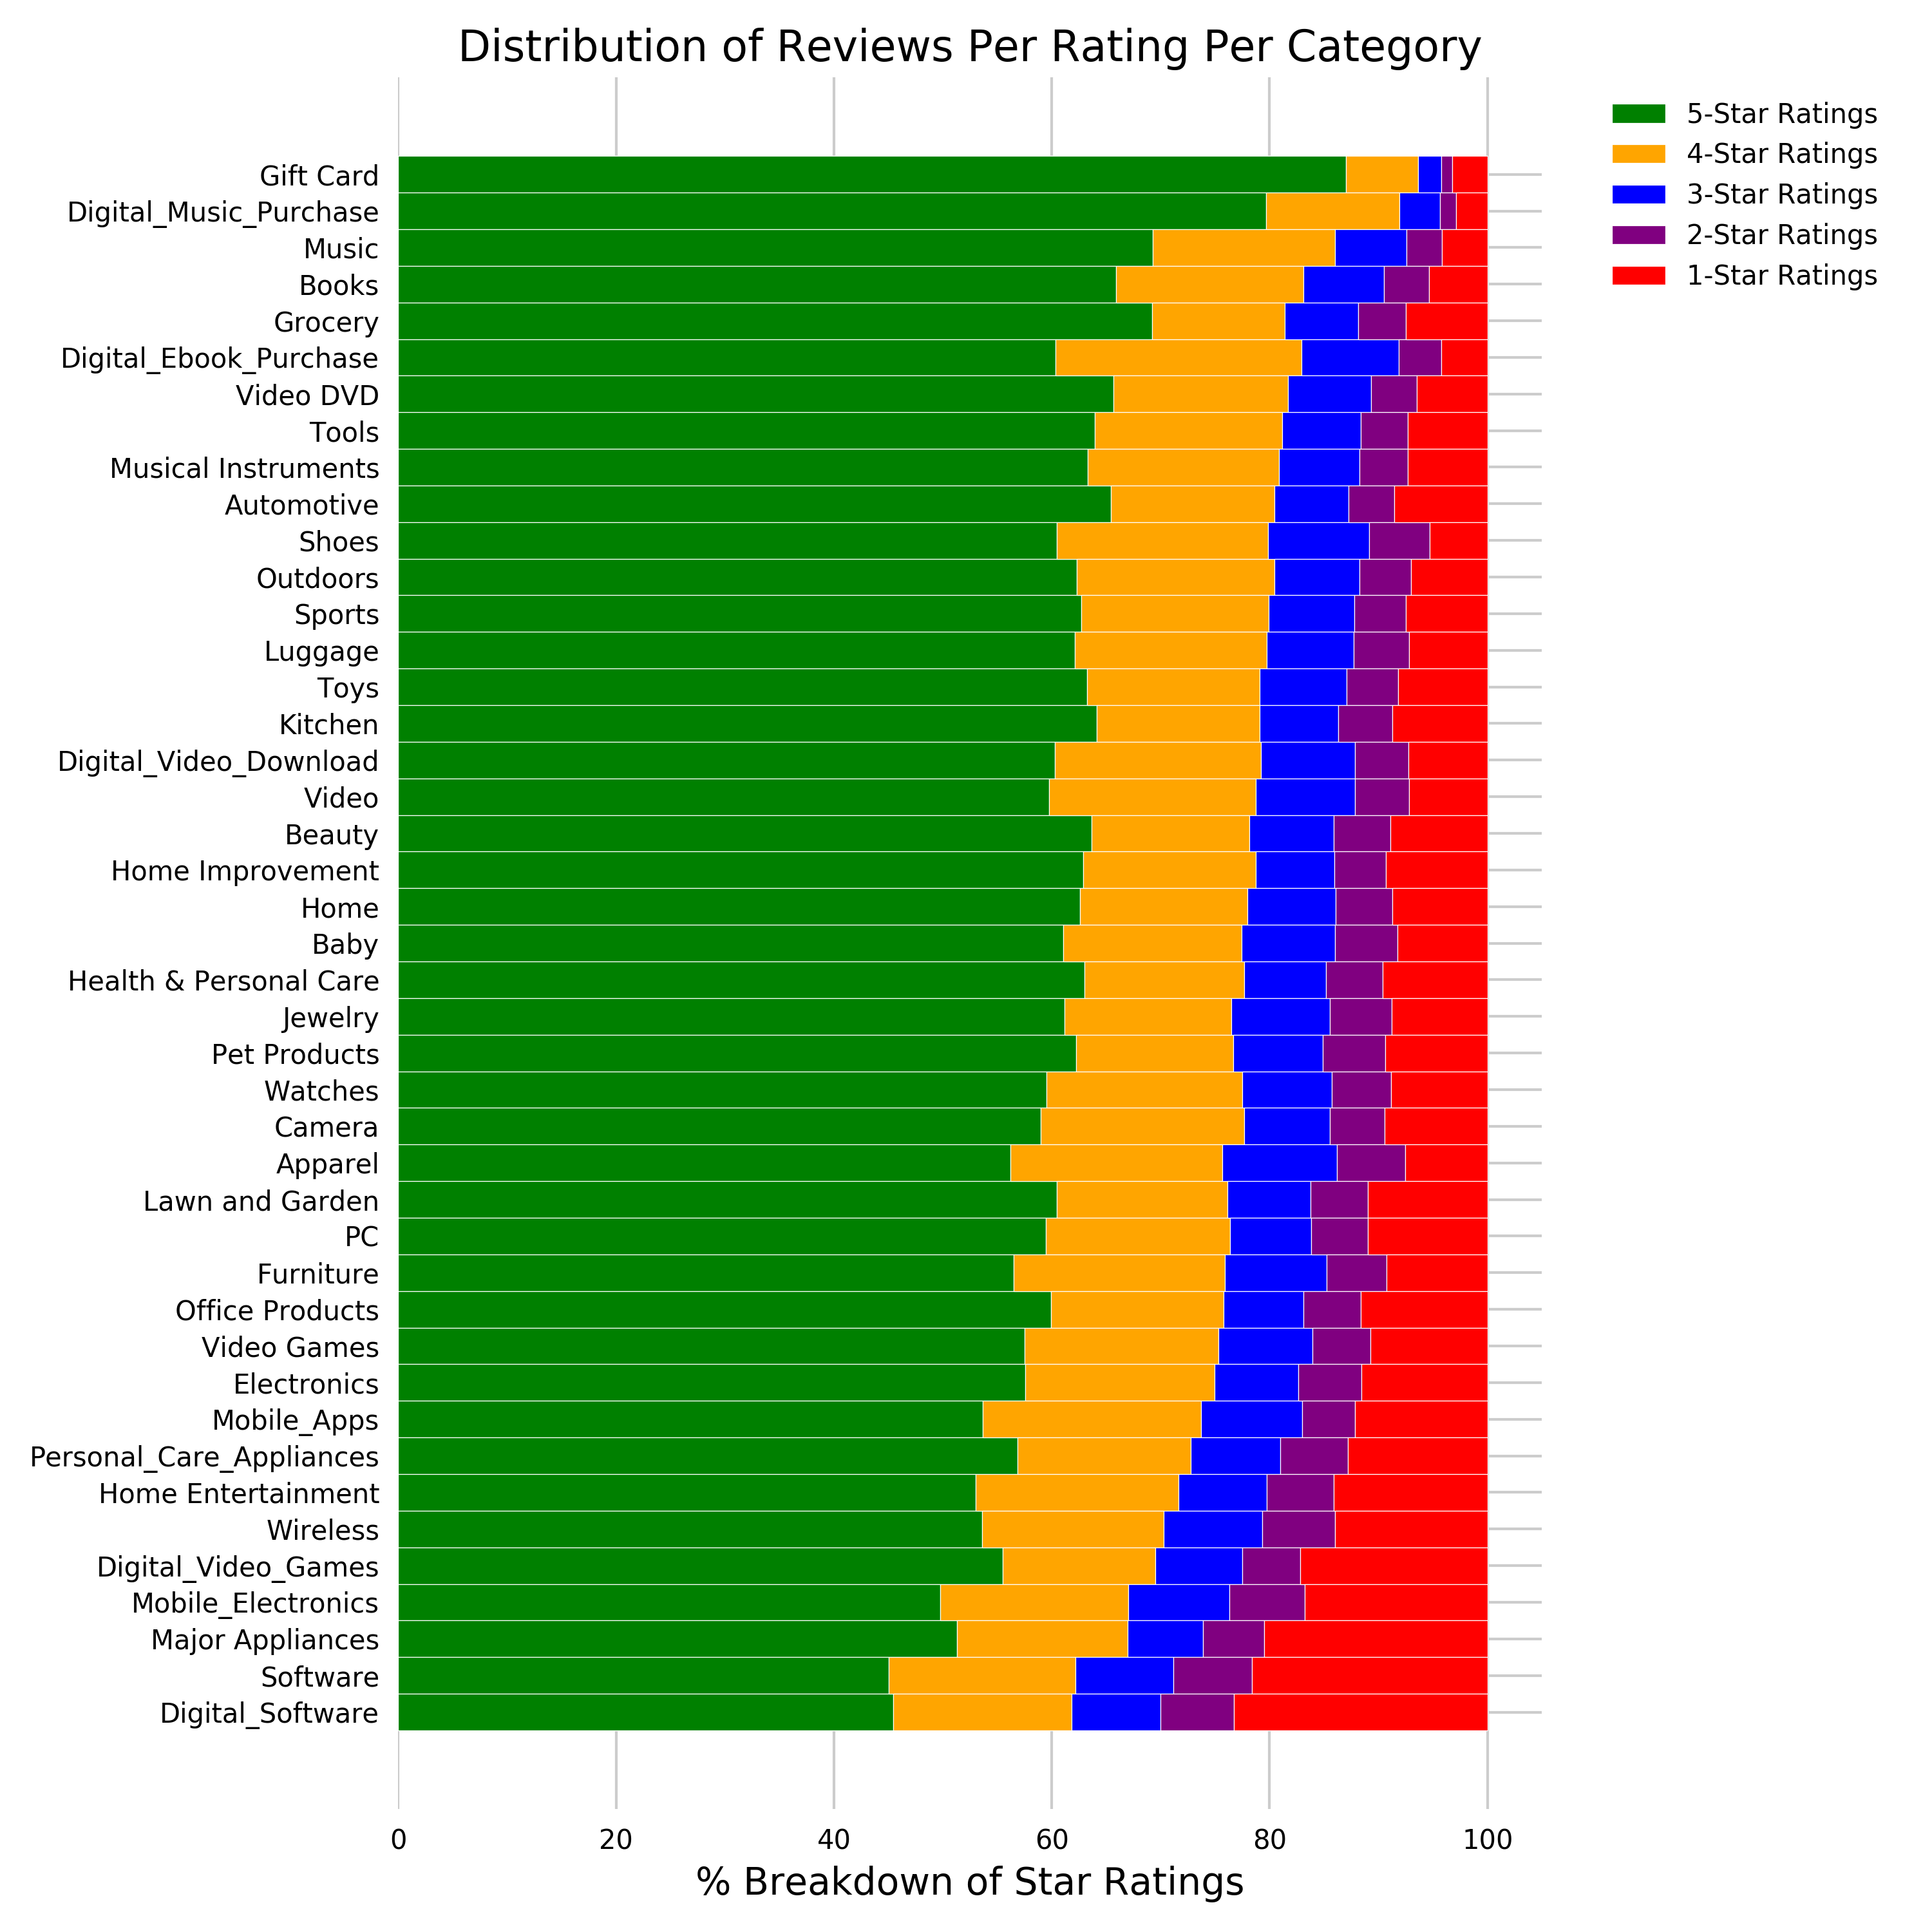

## 5. How Many Reviews per Star Rating? (5, 4, 3, 2, 1)

In [ ]:
# SQL statement
statement = """
    SELECT star_rating, COUNT(*) AS Count_Review
    FROM {}.{}
    WHERE product_category in ('Digital_Software', 'Gift_Card', 'Digital_Video_Games') 
    GROUP BY star_rating
    ORDER BY star_rating DESC, Count_Review 
""".format(
    database_name, table_name
)

print(statement)

df = pd.read_sql(statement, conn)
df.head(5)

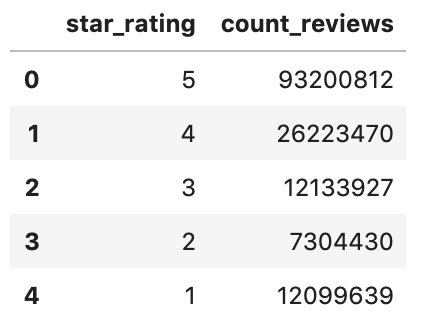

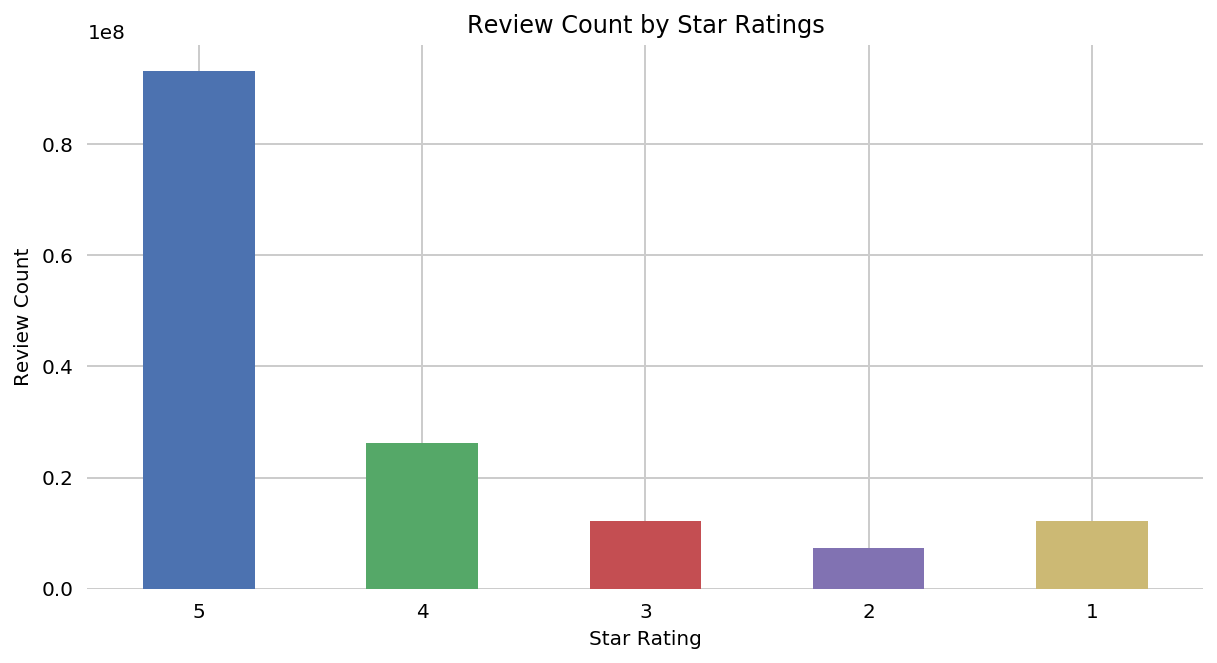

## 6. How Did Star Ratings Change Over Time?

In [ ]:
# SQL statement
statement = """
    SELECT year, ROUND(AVG(star_rating), 4) AS Avg_Star_Rating
    FROM {}.{}
    WHERE product_category in ('Digital_Software', 'Gift_Card', 'Digital_Video_Games') 
    GROUP BY year
    ORDER BY year
""".format(
    database_name, table_name
)

print(statement)

df = pd.read_sql(statement, conn)
df.head(5)

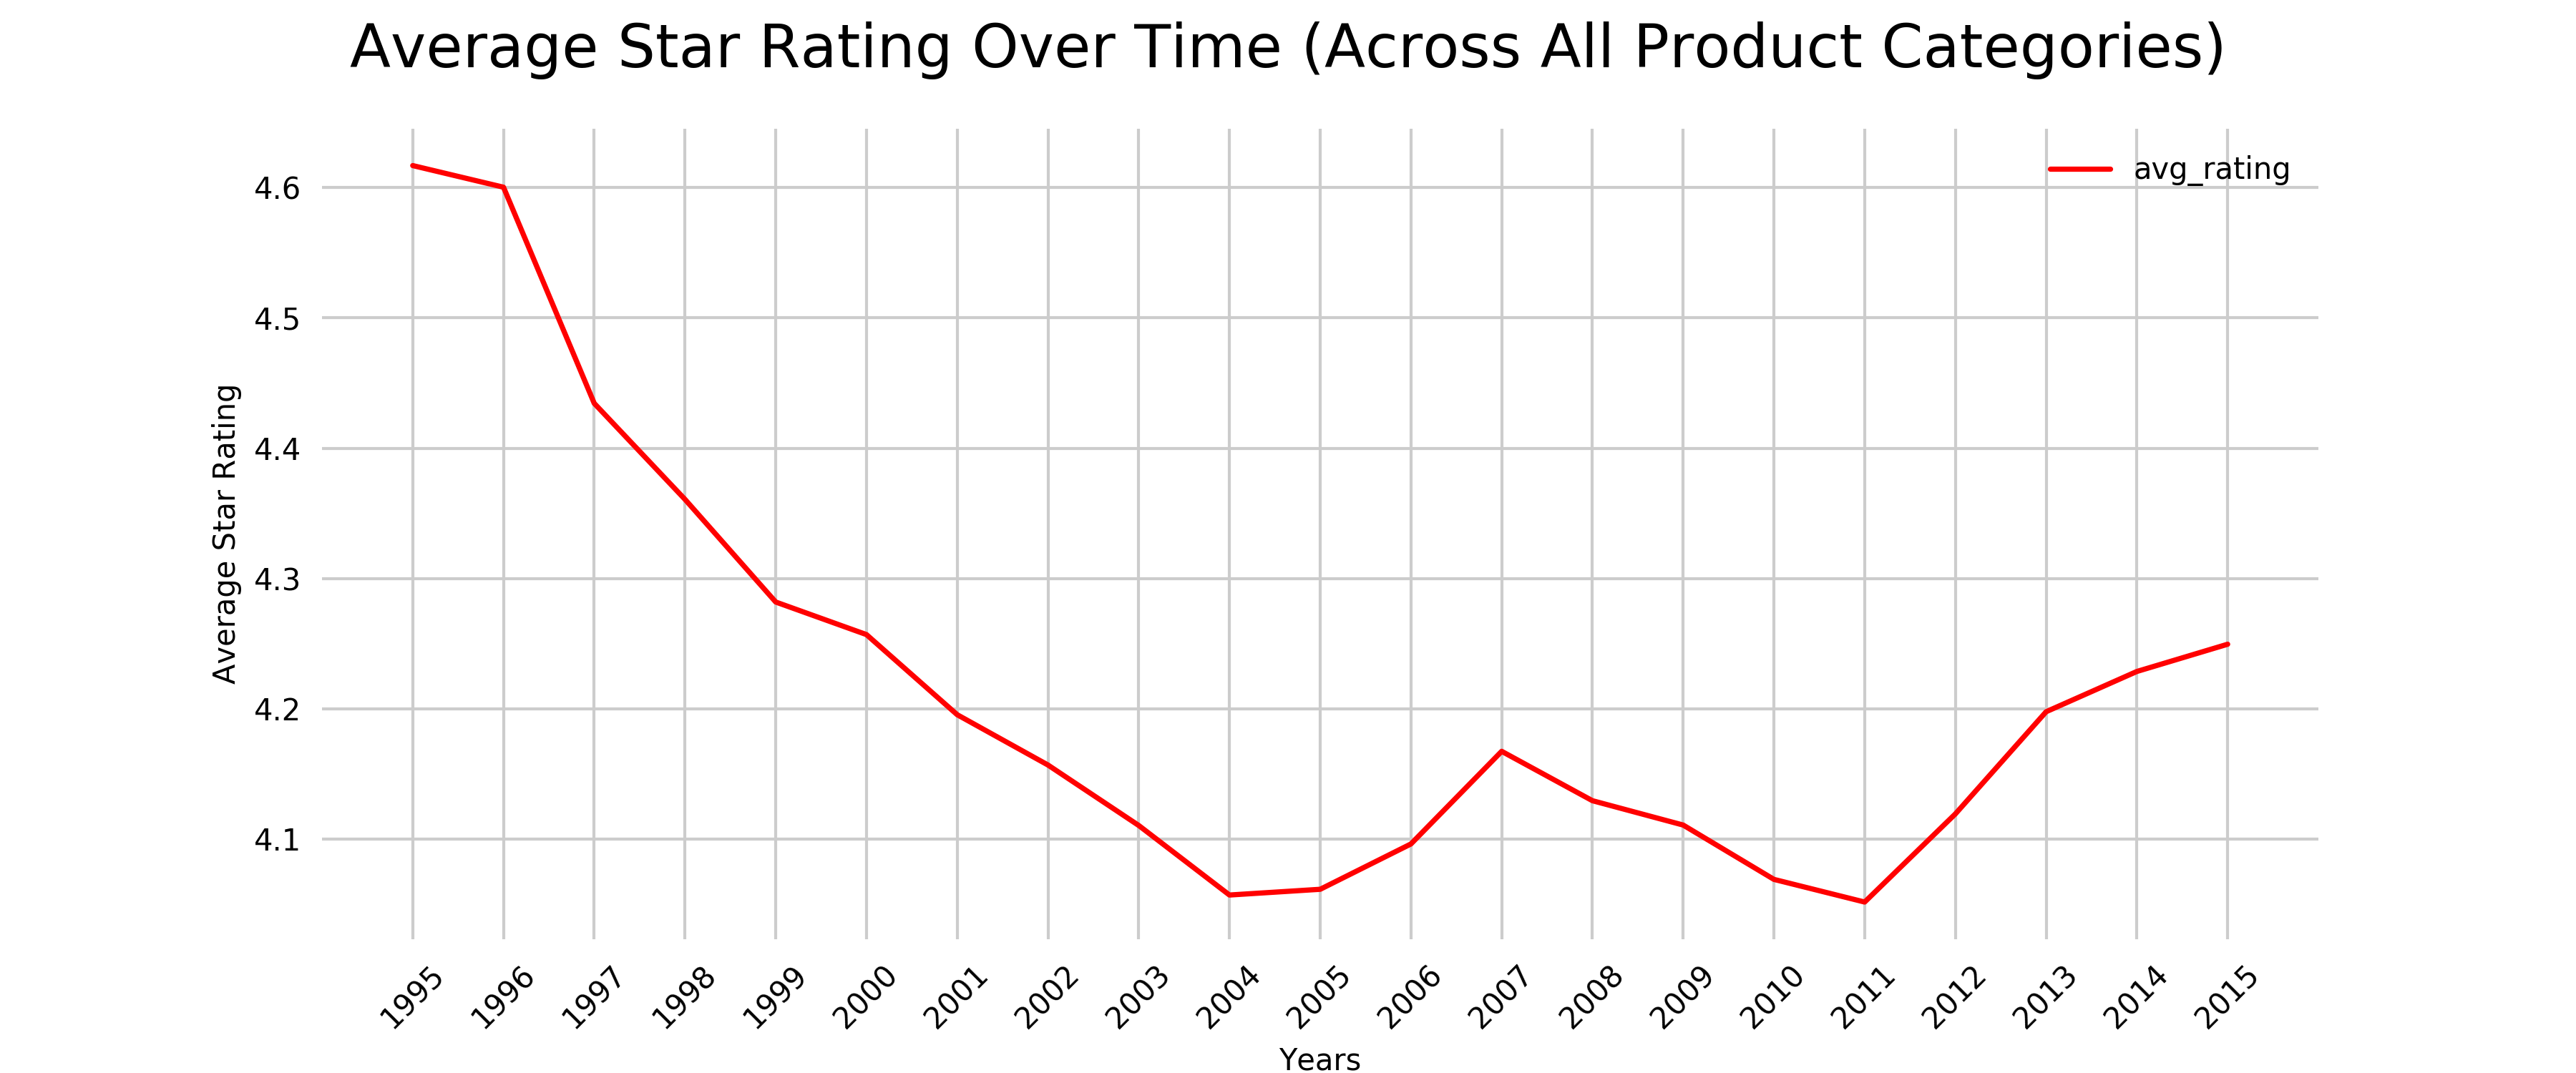

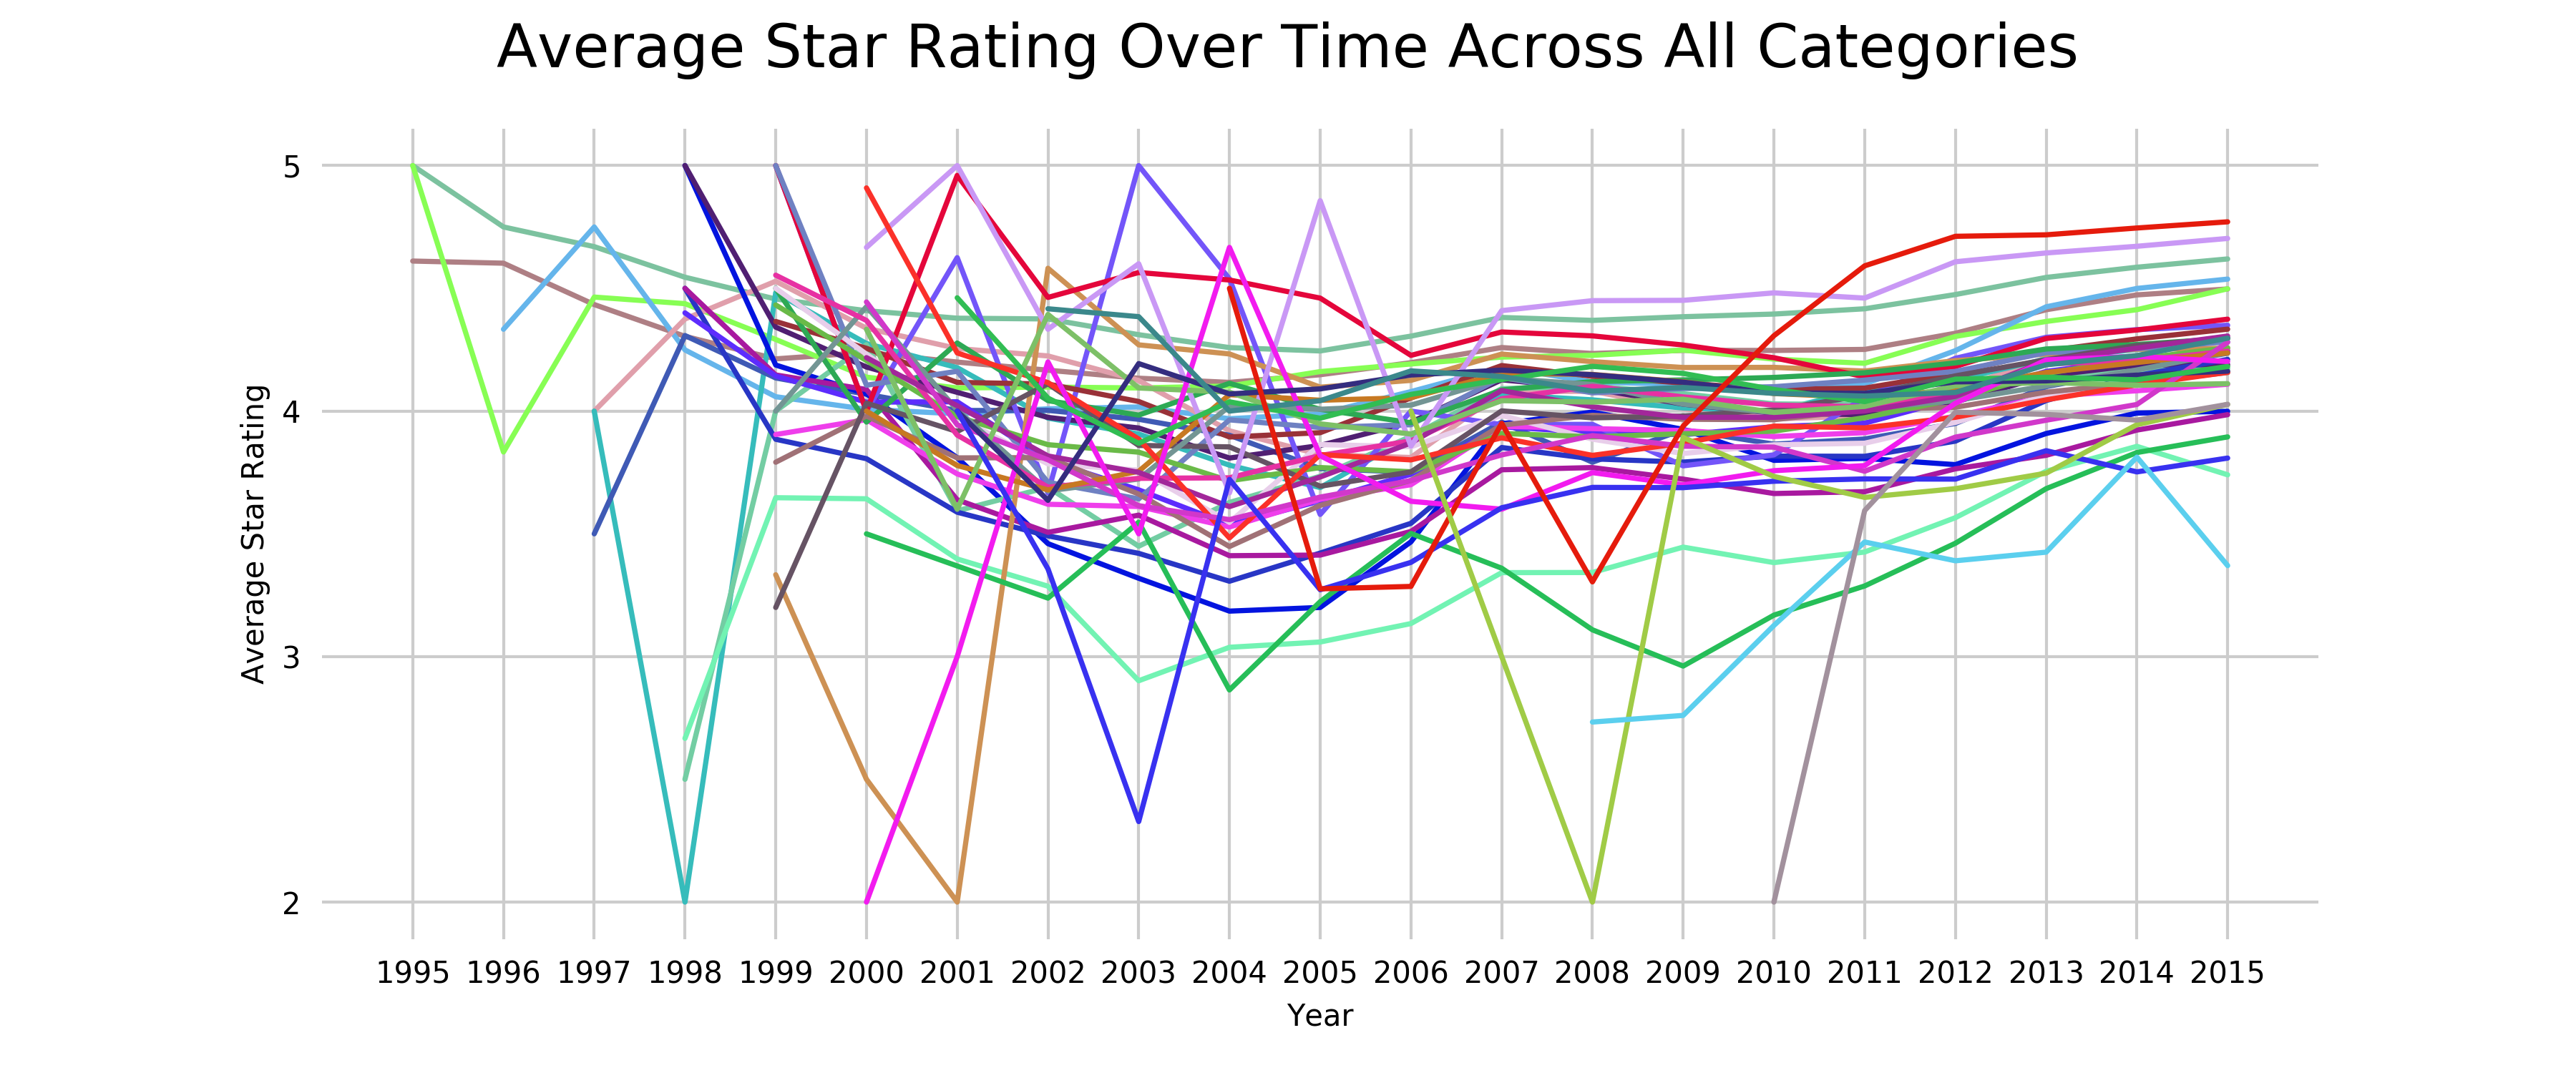

## 7. Which Star Ratings (1-5) are Most Helpful?

In [ ]:
# SQL statement
statement = """
    SELECT star_rating, AVG(helpful_votes) AS Avg_Helpful_Vote
    FROM {}.{}
    WHERE product_category in ('Digital_Software', 'Gift_Card', 'Digital_Video_Games') 
    GROUP BY star_rating
    ORDER BY star_rating ASC
""".format(
    database_name, table_name
)

print(statement)

df = pd.read_sql(statement, conn)
df.head(5)

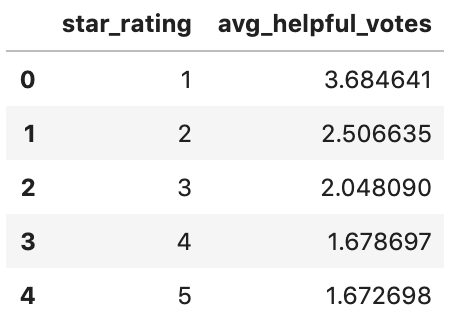

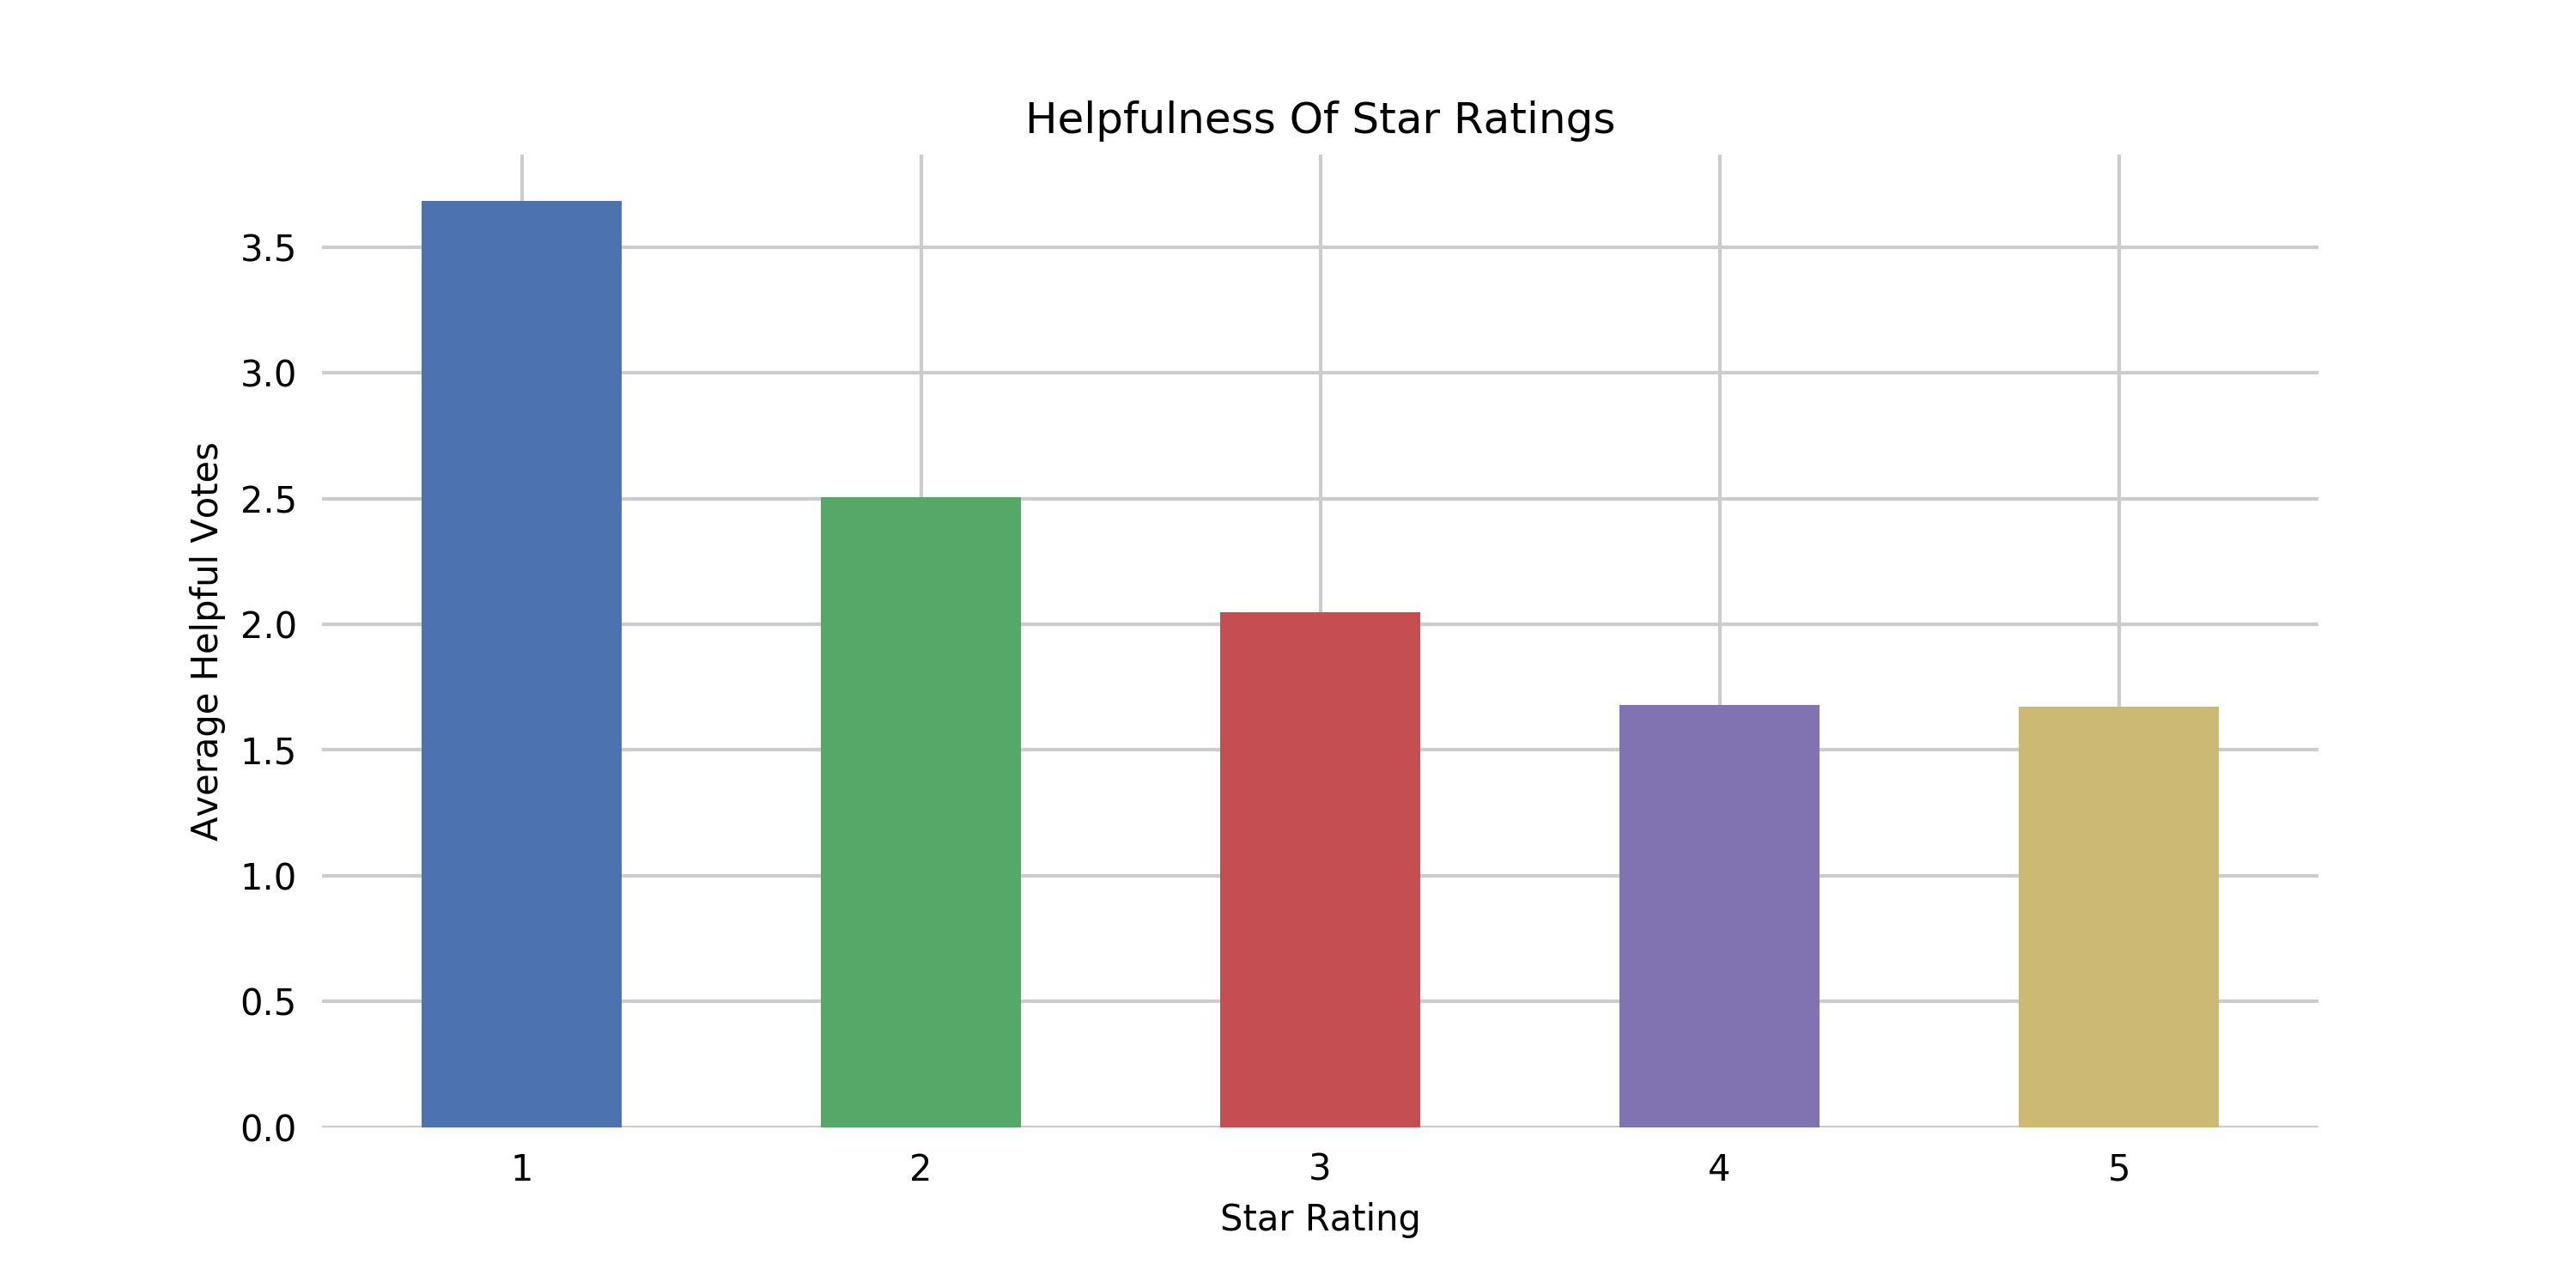

## 8. Which Products have Most Helpful Reviews? How Long are the Most Helpful Reviews?

In [ ]:
# SQL statement
statement = """
    SELECT product_title, SUM(helpful_votes) AS Sum_Helpful_Vote, 
           AVG(star_rating) AS Avg_Star_Rating,
           LENGTH(review_body) AS Lenth_Review_Body,
           SUBSTR(review_body, 1, 100) AS Substr_Review_Body
    FROM {}.{}
    WHERE product_category in ('Digital_Software', 'Gift_Card', 'Digital_Video_Games') 
    GROUP BY product_title
    ORDER BY Sum_Helpful_Vote DESC
""".format(
    database_name, table_name
)

print(statement)

df = pd.read_sql(statement, conn)
df.head(5)

The following illustrates the syntax of the `OFFSET` and `FETCH` clauses:

`ORDER BY` column_list [ASC |DESC]

`OFFSET` offset_row_count {ROW | ROWS}

`FETCH` {FIRST | NEXT} fetch_row_count {ROW | ROWS} ONLY

In [ ]:
# SQL statement 
statement = """
    SELECT product_title, helpful_votes, star_rating,
           LENGTH(review_body) AS Lenth_Review_Body,
           SUBSTR(review_body, 1, 100) AS Substr_Review_Body
    FROM {}.{}
    WHERE product_category in ('Digital_Software', 'Gift_Card', 'Digital_Video_Games') 
    ORDER BY helpful_vote DESC
    LIMIT 10
""".format(
    database_name, table_name
)

print(statement)

df = pd.read_sql(statement, conn)
df.head(5)

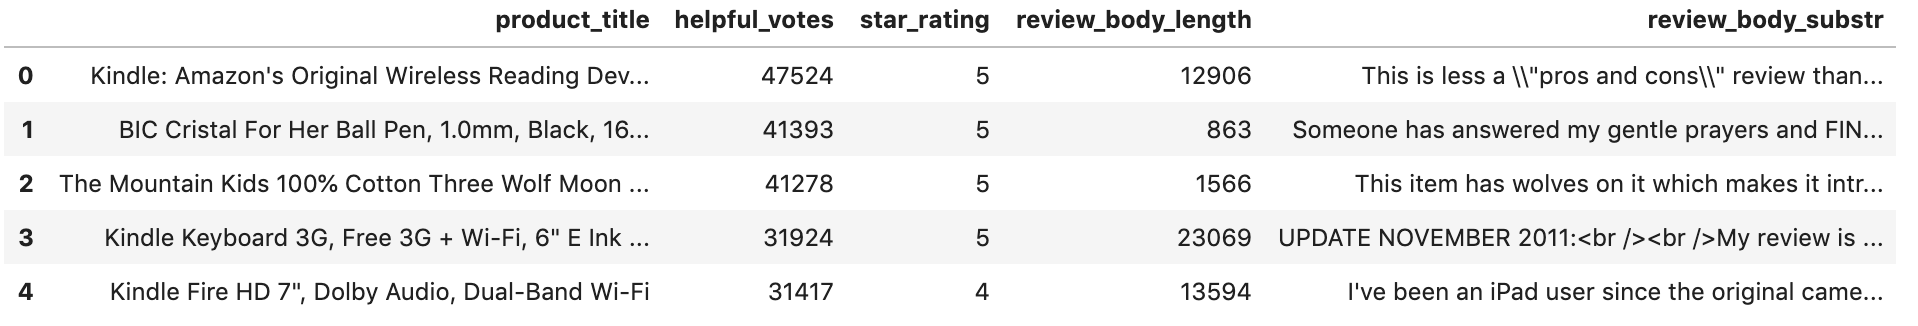

## 9. What is the Ratio of Positive (5, 4) to Negative (3, 2 ,1) Reviews?

In [ ]:
# SQL statement
statement = """
    SELECT (CAST(Count_Positive_Review)/CAST(Count_Negative_Review)) AS Ratio_Positive2Negative_Sentiment
    FROM (
    SELECT COUNT(*) AS Count_Positive_Review
    FROM {}.{}
    WHERE star_rating >= 4 AND product_category in ('Digital_Software', 'Gift_Card', 'Digital_Video_Games')
    ),(
    SELECT COUNT(*) AS Count_Negative_Review
    FROM {}.{}
    WHERE star_rating <= 3 AND product_category in ('Digital_Software', 'Gift_Card', 'Digital_Video_Games')
    )
""".format(
    database_name, table_name
)

print(statement)

df = pd.read_sql(statement, conn)
df.head(5)

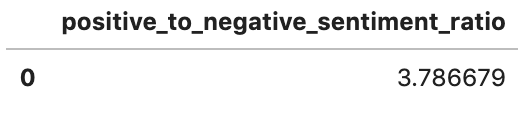

## 10. Which Customers are Abusing the Review System by Repeatedly Reviewing the Same Product? What Was Their Average Star Rating for Each Product?

In [ ]:
# SQL statement
statement = """
    SELECT customer_id, product_category, product_title, 
           COUNT(*) AS Count_Review, 
           ROUND(AVG(star_rating), 4) AS Avg_Star_Rating
    FROM {}.{}
    WHERE product_category in ('Digital_Software', 'Gift_Card', 'Digital_Video_Games')
    GROUP BY customer_id, product_category, product_title
    HAVING Count_Review > 1
    ORDER BY Count_Review DESC
    LIMIT 5
""".format(
    database_name, table_name
)

print(statement)

df = pd.read_sql(statement, conn)
df.head(5)

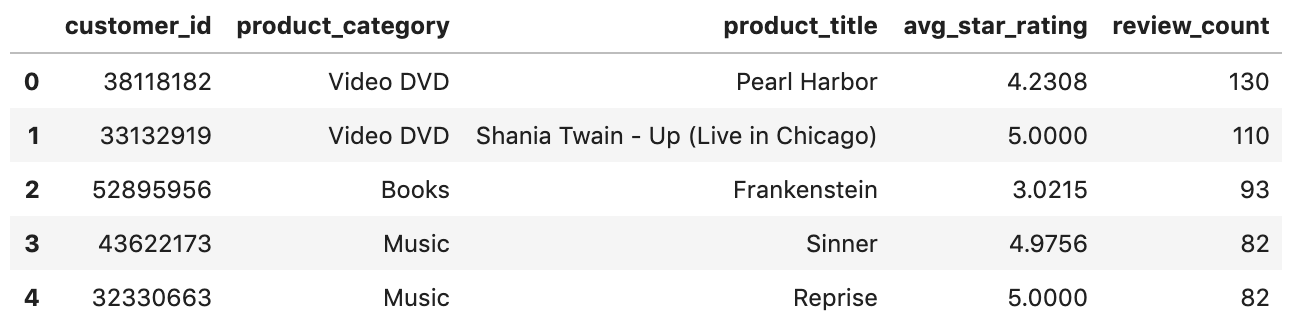

## 11. What is the distribution of review lengths (number of words)?

In [ ]:
# SQL statement
statement = """
    SELECT CARDINALITY(SPLIT(review_body, ' ')) AS num_words
    FROM {}.{}
    WHERE product_category in ('Digital_Software', 'Gift_Card', 'Digital_Video_Games')
""".format(
    database_name, table_name
)

print(statement)

df = pd.read_sql(statement, conn)
df.head(5)